In [1]:
import MIMENet
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json

In [2]:
#set path to simulation data
simulation_path = "/mnt/d/data/MIME_data/simData/dmMIME/highSpecies/experimentalConditions"

In [3]:
#set training parameters
training_path = simulation_path+'/data2/trainingData.txt'
epochs = 20
learning_rate = 0.00001
batch_size = 2**11
lambda_l1 = 0.00001
hidden_size_factor = 2
bottleneck = 1/2

In [4]:
model, history = MIMENet.train(training_path, epochs, learning_rate, batch_size, lambda_l1, hidden_size_factor, bottleneck, simulation_path+'/secondFromProt1/prot1/single_kds.txt')

Device: cuda:0
Epoch: 1/20


100%|██████████| 400/400 [00:00<00:00, 1595.77it/s]


Epoch: 2/20


100%|██████████| 400/400 [00:00<00:00, 2508.73it/s]


Epoch: 3/20


100%|██████████| 400/400 [00:00<00:00, 2630.67it/s]


Epoch: 4/20


100%|██████████| 400/400 [00:00<00:00, 1556.76it/s]


Epoch: 5/20


100%|██████████| 400/400 [00:00<00:00, 2216.42it/s]


Epoch: 6/20


100%|██████████| 400/400 [00:00<00:00, 1792.92it/s]


Epoch: 7/20


100%|██████████| 400/400 [00:00<00:00, 2551.68it/s]


Epoch: 8/20


100%|██████████| 400/400 [00:00<00:00, 2133.51it/s]


Epoch: 9/20


100%|██████████| 400/400 [00:00<00:00, 2592.16it/s]


Epoch: 10/20


100%|██████████| 400/400 [00:00<00:00, 2649.27it/s]


Epoch: 11/20


100%|██████████| 400/400 [00:00<00:00, 1904.00it/s]


Epoch: 12/20


100%|██████████| 400/400 [00:00<00:00, 2538.26it/s]


Epoch: 13/20


100%|██████████| 400/400 [00:00<00:00, 2429.31it/s]


Epoch: 14/20


100%|██████████| 400/400 [00:00<00:00, 2305.43it/s]


Epoch: 15/20


100%|██████████| 400/400 [00:00<00:00, 2040.06it/s]


Epoch: 16/20


100%|██████████| 400/400 [00:00<00:00, 2129.52it/s]


Epoch: 17/20


100%|██████████| 400/400 [00:00<00:00, 2234.80it/s]


Epoch: 18/20


100%|██████████| 400/400 [00:00<00:00, 2120.31it/s]


Epoch: 19/20


100%|██████████| 400/400 [00:00<00:00, 2140.22it/s]


Epoch: 20/20


100%|██████████| 400/400 [00:00<00:00, 2463.12it/s]


In [5]:
#save model
torch.save(model.state_dict(), './modelExpCond.pth')

In [6]:
#save training history as json
with open('./history_exp.json', 'w') as f:
    json.dump(history, f)

In [4]:
#load saved model, training history, and prediction history
input_size = len(open(training_path).readline().split(' ')) - 1
model = MIMENet.MIMENet(input_size, hidden_size_factor, bottleneck, 1)
model.load_state_dict(torch.load('./modelExpCond.pth'))
#puto model to gpu
model.to('cuda:0')
#put model in eval mode
model.eval()
#load history
with open('./history_exp.json', 'r') as f:
    history = json.load(f)

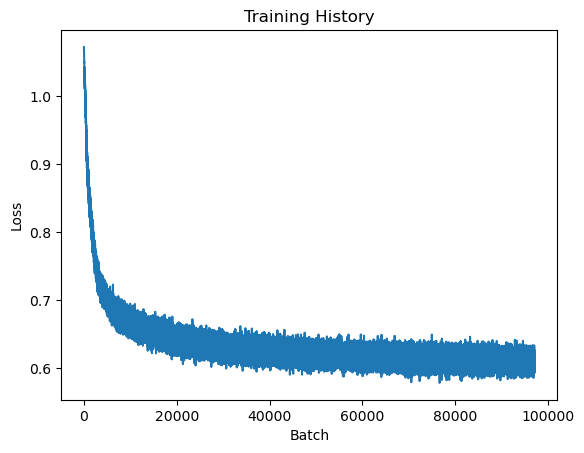

In [5]:
#plot training history
plt.plot(history['training'])
plt.title("Training History")
plt.ylabel("Loss")
plt.xlabel("Batch")
#limit x axis
#plt.xlim(0, 1000)
plt.show()

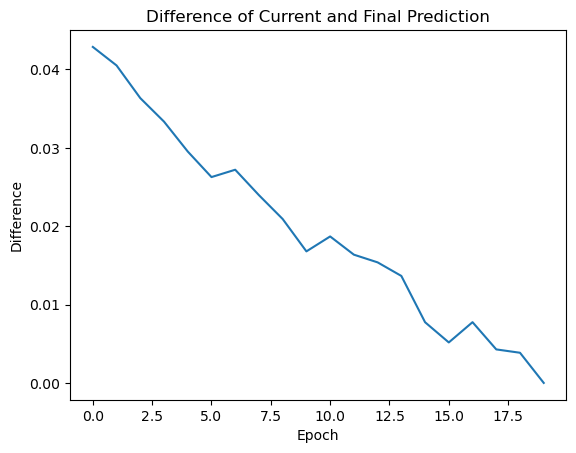

In [6]:
#plot difference of current and final prediction

#initialize difference array
predictions = np.array(history['prediction'])
difference = np.zeros((predictions.shape[0], predictions.shape[1]))
#calculate difference
for i in range(predictions.shape[0]):
    difference[i] = np.abs(predictions[i] - predictions[-1])
#average over columns
difference = np.mean(difference, axis=1)
#plot difference
plt.plot(difference)
plt.title("Difference of Current and Final Prediction")
plt.ylabel("Difference")
plt.xlabel("Epoch")
plt.show()

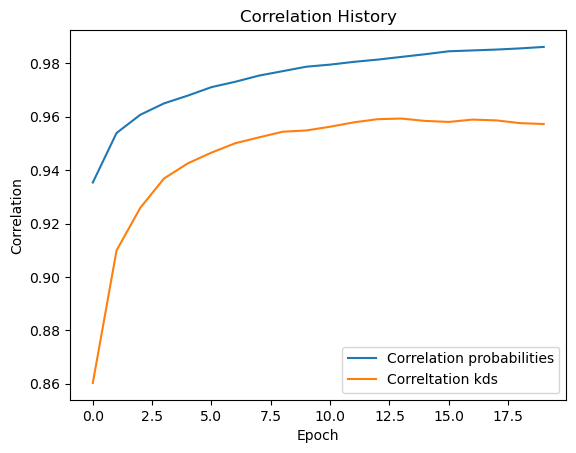

In [7]:
#plot correlation history rows as lines
plt.plot(history['correlation_probs'], label='Correlation probabilities')
plt.plot(history['correlation_kds'], label='Correltation kds')
plt.legend()
plt.title("Correlation History")
plt.ylabel("Correlation")
plt.xlabel("Epoch")
plt.show()

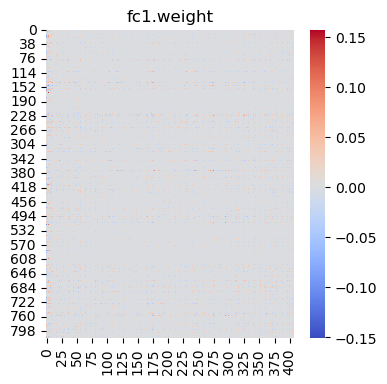

max weight value:  0.15684007
min weight value:  -0.15020905
number of pruned weights:  199495
number of non zero weights:  133433


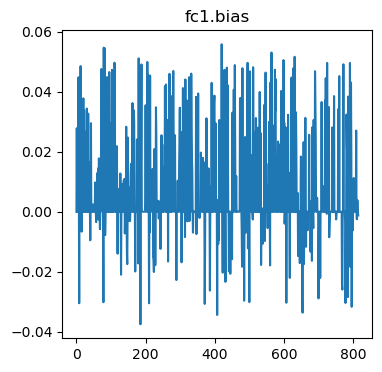

max bias value:  0.055878602
min bias value:  -0.03757839
number of pruned biases:  371
number of non zero biases:  445


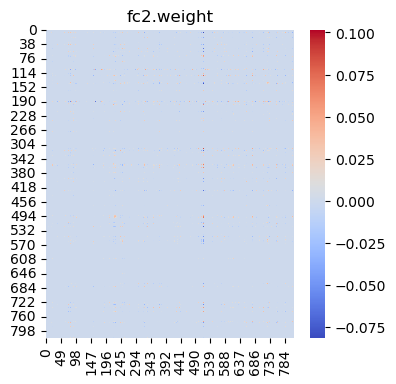

max weight value:  0.10162821
min weight value:  -0.08120402
number of pruned weights:  610418
number of non zero weights:  55438


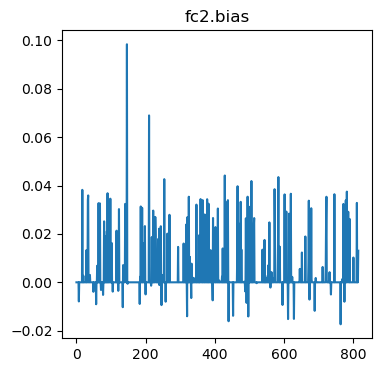

max bias value:  0.09835911
min bias value:  -0.01734199
number of pruned biases:  624
number of non zero biases:  192


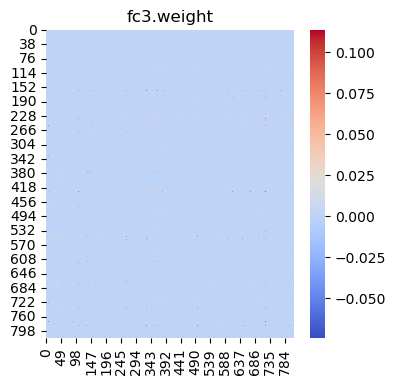

max weight value:  0.11379591
min weight value:  -0.074495815
number of pruned weights:  657241
number of non zero weights:  8615


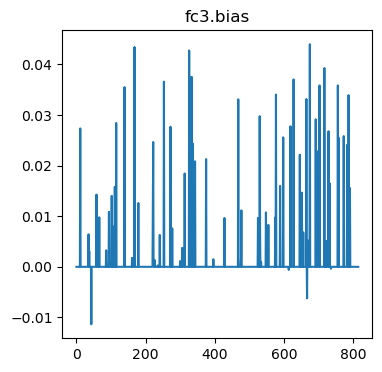

max bias value:  0.04398915
min bias value:  -0.011358977
number of pruned biases:  740
number of non zero biases:  76


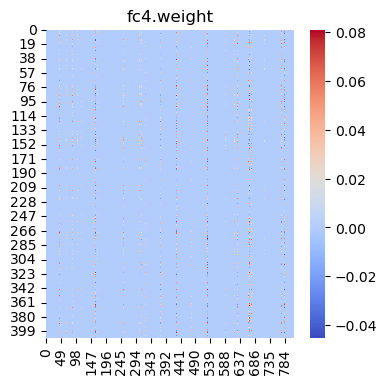

max weight value:  0.08104194
min weight value:  -0.045209024
number of pruned weights:  318679
number of non zero weights:  14249


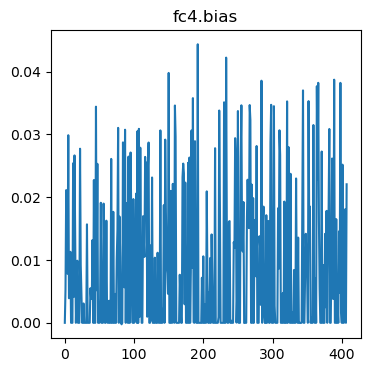

max bias value:  0.044344727
min bias value:  -0.00023294876
number of pruned biases:  178
number of non zero biases:  230


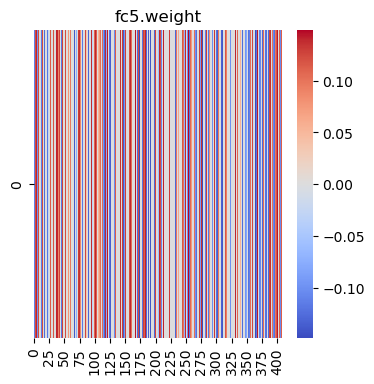

max weight value:  0.14910097
min weight value:  -0.14797212
number of pruned weights:  177
number of non zero weights:  231


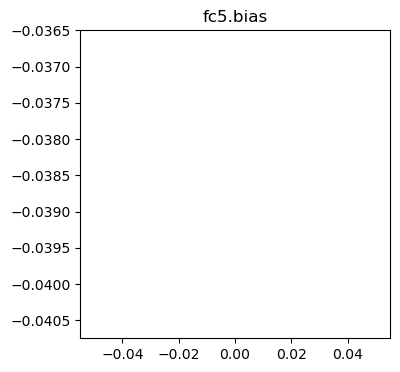

max bias value:  -0.038622387
min bias value:  -0.038622387
number of pruned biases:  0
number of non zero biases:  1


In [8]:
for name, param in model.named_parameters():
    #if weight is not a bias
    if 'bias' not in name:
        #reshape weights to 2d array
        weight = param.data.cpu().numpy().reshape(param.data.cpu().numpy().shape[0], param.data.cpu().numpy().shape[1])
        #plot heatmap of weights
        plt.figure(figsize=(4,4))
        sns.heatmap(weight, cmap='coolwarm')
        plt.title(name)
        plt.show()

        print('max weight value: ', np.max(weight))
        print('min weight value: ', np.min(weight))
        #print('number of weights: ', weight.size)
        print('number of pruned weights: ', np.sum(weight == 0))
        print('number of non zero weights: ', np.sum(weight != 0))

    else:
        bias = param.data.cpu().numpy()
        #plot histogram of biases
        plt.figure(figsize=(4,4))
        sns.lineplot(bias.flatten())
        plt.title(name)
        plt.show()
 
        print('max bias value: ', np.max(bias))
        print('min bias value: ', np.min(bias))
        #print('number of biases: ', bias.size)
        print('number of pruned biases: ', np.sum(bias == 0))
        print('number of non zero biases: ', np.sum(bias != 0))

In [9]:
#get percent of parameters pruned
total_params = 0
pruned_params = 0
for param in model.parameters():
    total_params += param.numel()
    pruned_params += np.sum(param.data.cpu().numpy() == 0)
print('percent of parameters pruned: ', pruned_params/total_params)

percent of parameters pruned:  0.8935893200481999


In [10]:
# read in kd values
kds = np.loadtxt(simulation_path+'/secondFromProt1/prot1/single_kds.txt')

#insert 1 at position 0 and then every 3rd position
kds = np.insert(kds, 0, 1)
kds = np.insert(kds, np.arange(4, len(kds), 3), 1)
kds[0:10]

array([1.      , 0.299539, 3.60582 , 1.      , 1.      , 0.903664,
       1.      , 0.64211 , 1.      , 0.291765])

In [11]:
input_size = len(open(training_path).readline().split(' ')) - 1
predictions = MIMENet.inferSingleProbabilities(model, input_size)

100%|██████████| 400/400 [00:00<00:00, 520.58it/s]


In [12]:
#calculate predicted kds by 1/prediction - 1
predicted_kds = 1/np.array(predictions) - 1

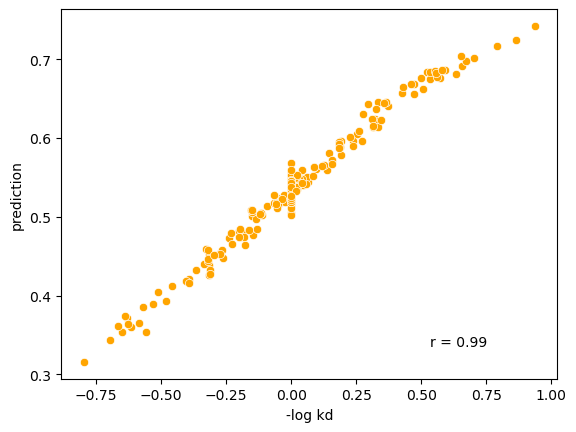

In [13]:
#two plots -log kd vs predictionZeroConc and predictionOneConc
sns.scatterplot(x=-np.log10(kds), y=predictions, color='orange')
plt.xlabel('-log kd')
plt.ylabel('prediction')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(-np.log10(kds), predictions)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

Text(0, 0.5, 'z score')

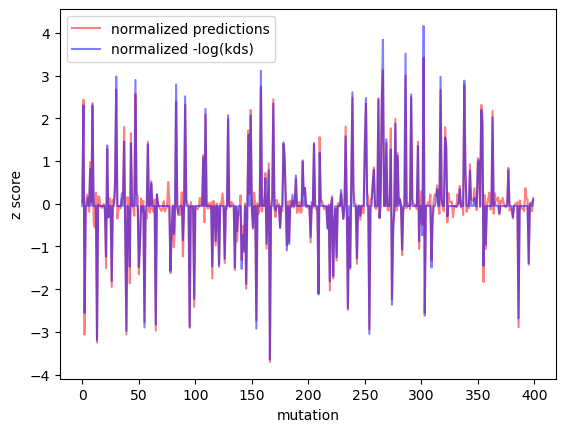

In [14]:
#z score predictions
predictionsNorm = (predictions - np.mean(predictions))/np.std(predictions)

#z score -np.log(kds)
kdsNorm = (-np.log10(kds) - np.mean(-np.log10(kds)))/np.std(-np.log10(kds))

#lineplot of z score predictions
sns.lineplot(x=np.arange(0, len(predictionsNorm)), y=predictionsNorm, label='normalized predictions', color='red', alpha=0.5)
sns.lineplot(x=np.arange(0, len(kdsNorm)), y=kdsNorm, label='normalized -log(kds)', color='blue', alpha=0.5)
plt.xlabel('mutation')
plt.ylabel('z score')

(0.0, 1.0)

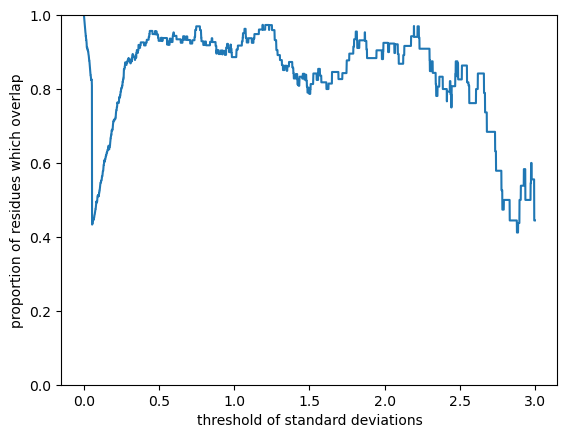

In [15]:
#check overlap of normalized predictions and normalized -log(kds) for absolute value greater than 0.5
#loop over threshold values
overlapProportions = []
for threshold in np.arange(0, 3, 0.001):
    #get indices of scaled predictions and scaled -log(kds) that are greater than the threshold
    indices = np.where(np.abs(predictionsNorm) > threshold)[0]
    indices2 = np.where(np.abs(kdsNorm) > threshold)[0]
    #get the intersection of the two sets of indices
    overlap = np.intersect1d(indices, indices2)
    #get the proportion of the intersection to the union of the two sets of indices
    overlapProportions.append(len(overlap)/len(np.union1d(indices, indices2)))

#plot overlapProportions
sns.lineplot(x=np.arange(0, 3, 0.001), y=overlapProportions)
plt.xlabel('threshold of standard deviations')
plt.ylabel('proportion of residues which overlap')
plt.ylim(0, 1)

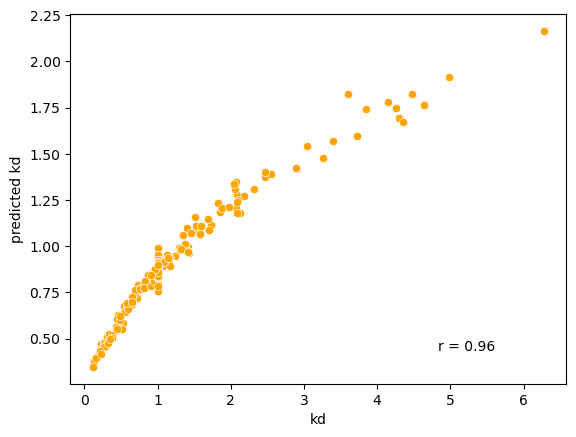

In [16]:
#plot predicted kds vs actual kds
sns.scatterplot(x=kds, y=predicted_kds, color='orange')
plt.xlabel('kd')
plt.ylabel('predicted kd')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(kds, predicted_kds)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

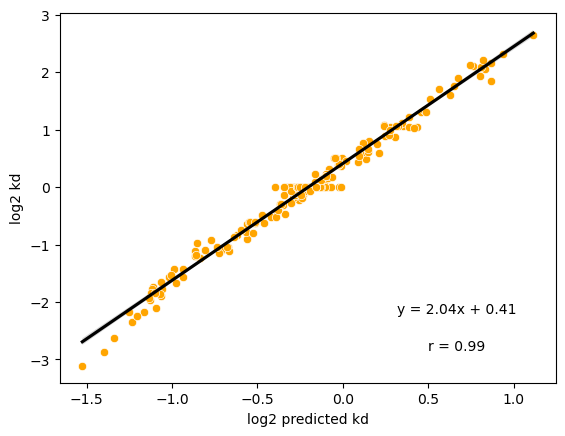

In [17]:
#plot log2 predicted kd vs log2 kd
sns.scatterplot(x=np.log2(predicted_kds), y=np.log2(kds), color='orange')
plt.xlabel('log2 predicted kd')
plt.ylabel('log2 kd')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(np.log2(predicted_kds), np.log2(kds))[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
#show line of best fit
sns.regplot(x=np.log2(predicted_kds), y=np.log2(kds), scatter=False, color='black')
#show regression line equation
plt.text(0.8, 0.2, 'y = '+str(np.round(np.polyfit(np.log2(predicted_kds), np.log2(kds), 1)[0], 2))+'x + '+str(np.round(np.polyfit(np.log2(predicted_kds), np.log2(kds), 1)[1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

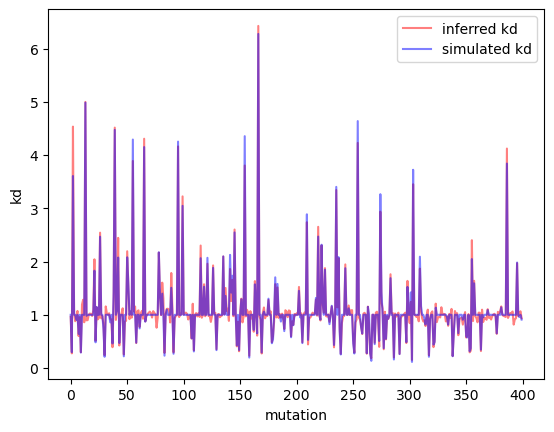

In [18]:
#lienplot of predicted kds
sns.lineplot(x=np.arange(len(predicted_kds)), y=2**(2.04*np.log2(predicted_kds)+0.41), label='inferred kd', color='red', alpha=0.5)
#lineplot of actual kds
sns.lineplot(x=np.arange(len(kds)), y=kds, label= 'simulated kd', color='blue', alpha=0.5)
plt.xlabel('mutation')
plt.ylabel('kd')
plt.legend()
plt.show()

In [19]:
input_size = len(open(training_path).readline().split(' ')) - 1
predictionsPairwise = MIMENet.inferPairwiseProbabilities(model, input_size)

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


In [20]:
pairwisePredictedKds = 1/np.array(predictionsPairwise) - 1

In [21]:
#load pairwise kd values
kdsPairwise = np.loadtxt(simulation_path+'/secondFromProt1/prot1/pairwise_kds.txt')
kdsPairwise[0:10]

array([0.270683, 0.299539, 0.192337, 3.25845 , 3.60582 , 2.31533 ,
       0.903664, 1.      , 0.64211 , 0.087395])

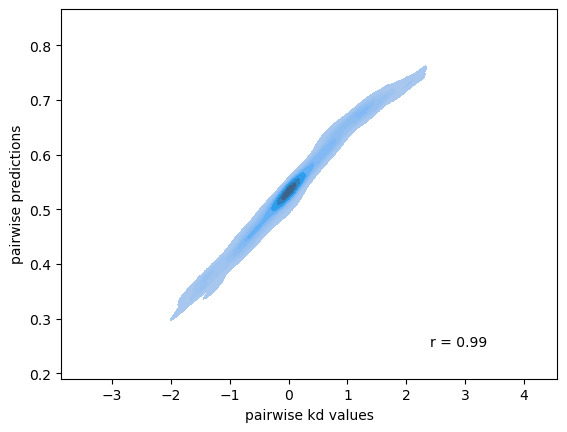

In [22]:
#get correlation coefficient
np.corrcoef(-np.log(kdsPairwise), predictionsPairwise)[0,1]
#density plot pairwise predictions vs pairwise kd values
sns.kdeplot(x=-np.log(kdsPairwise), y=predictionsPairwise, fill=True)
plt.xlabel('pairwise kd values')
plt.ylabel('pairwise predictions')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(-np.log(kdsPairwise), predictionsPairwise)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

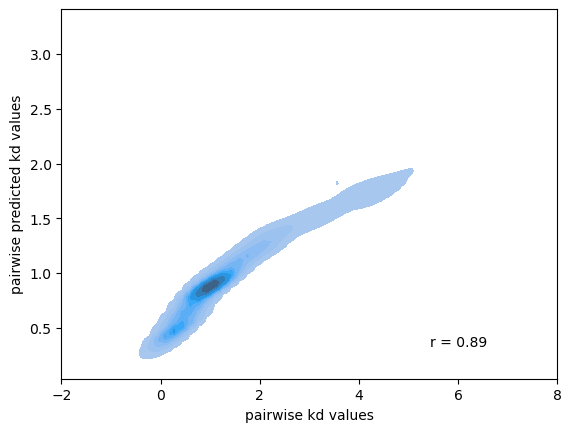

In [23]:
#get correlation coefficient
np.corrcoef(kdsPairwise, pairwisePredictedKds)[0,1]
#density plot pairwise predictions vs pairwise kd values
sns.kdeplot(x=kdsPairwise, y=pairwisePredictedKds, fill=True)
plt.xlabel('pairwise kd values')
plt.ylabel('pairwise predicted kd values')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(kdsPairwise, pairwisePredictedKds)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.xlim(-2, 8)
plt.show()

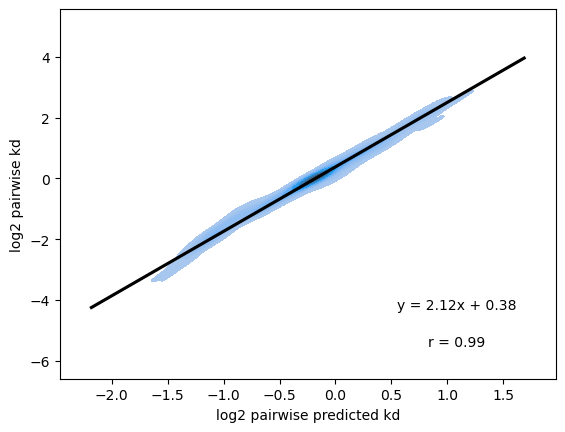

In [24]:
#plot log2 pairwise predicted kd vs log2 pairwise kd
sns.kdeplot(x=np.log2(pairwisePredictedKds), y=np.log2(kdsPairwise), fill=True)
plt.xlabel('log2 pairwise predicted kd')
plt.ylabel('log2 pairwise kd')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(np.log2(pairwisePredictedKds), np.log2(kdsPairwise))[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
#show line of best fit
sns.regplot(x=np.log2(pairwisePredictedKds), y=np.log2(kdsPairwise), scatter=False, color='black')
#show regression line equation
plt.text(0.8, 0.2, 'y = '+str(np.round(np.polyfit(np.log2(pairwisePredictedKds), np.log2(kdsPairwise), 1)[0], 2))+'x + '+str(np.round(np.polyfit(np.log2(pairwisePredictedKds), np.log2(kdsPairwise), 1)[1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

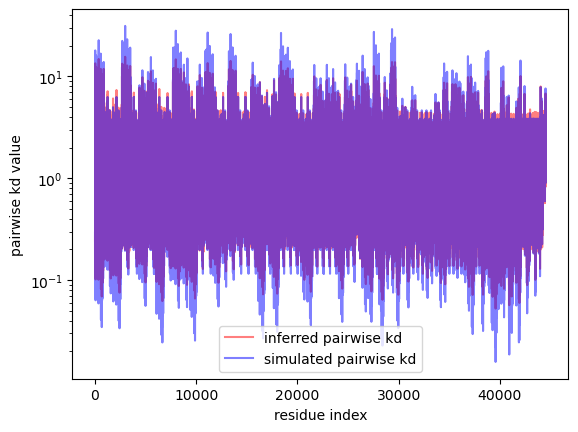

In [25]:
#lineplot of pairwise predictions
sns.lineplot(x=np.arange(0, len(predictionsPairwise)), y=2**(2.12*np.log2(pairwisePredictedKds)+0.38), label='inferred pairwise kd', color='red', alpha=0.5)
#lineplot of pairwise kd values
sns.lineplot(x=np.arange(0, len(kdsPairwise)), y=kdsPairwise, label='simulated pairwise kd', color='blue', alpha=0.5)
plt.xlabel('residue index')
plt.ylabel('pairwise kd value')
#log scale y axis
plt.yscale('log')
plt.legend()
plt.show()

In [27]:
input_size = len(open(training_path).readline().split(' ')) - 1
epistasisPairwise = MIMENet.inferEpistasis(model, input_size, singleKdCoefficient=2.04, singleKdIntercept=0.41, pairKdCoefficient=2.12, pairKdIntercept=0.38)
print(epistasisPairwise[0:10])
print(len(epistasisPairwise))

100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


[10.777586746052013, 10.997838135747504, 10.032900171834592, 10.358863773947046, 10.28235275715488, 10.547399263214247, 10.693610207148874, 10.658985279585913, 10.71891569673632, 9.090900501754858]
44550


In [28]:
#load pairwise epistasis values
epistasisPairwiseSim = np.loadtxt(simulation_path+'/secondFromProt1/prot1/pairwise_epistasis.txt')
print(epistasisPairwiseSim[0:10])
print(len(epistasisPairwiseSim))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
44550


Text(0, 0.5, 'epistasis')

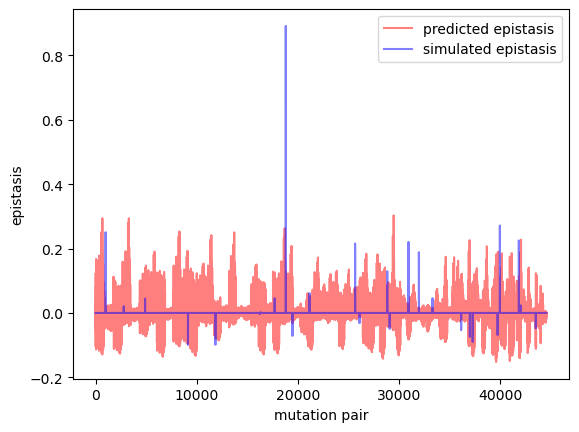

In [33]:
#log transform epistasis values
epistasisPairwiseLog = np.log(epistasisPairwise)
epistasisPairwiseSimLog = np.log(epistasisPairwiseSim)

#normalize predictions and simulated epistasis values
epistasisPairwiseNorm = ((epistasisPairwise - np.mean(epistasisPairwise))/np.max(epistasisPairwise))
epistasisPairwiseSimNorm = ((epistasisPairwiseSim - np.mean(epistasisPairwiseSim))/np.max(epistasisPairwiseSim))

#center predictions and simulated epistasis values
epistasisPairwiseCenter = (epistasisPairwise - np.mean(epistasisPairwise))
epistasisPairwiseSimCenter = (epistasisPairwiseSim - np.mean(epistasisPairwiseSim))

#lineplot of z score predictions
sns.lineplot(x=np.arange(0, len(epistasisPairwise)), y=epistasisPairwiseNorm, label='predicted epistasis', color='red', alpha=0.5)
sns.lineplot(x=np.arange(0, len(epistasisPairwiseSim)), y=epistasisPairwiseSimNorm, label='simulated epistasis', color='blue', alpha=0.5)
plt.xlabel('mutation pair')
plt.ylabel('epistasis')